<a href="https://colab.research.google.com/github/ChintaLokesh/Deep_Learning_Neural_Network/blob/master/Module_5_CNN_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

Do some necessary importslike:
a. Download the MNIST dataset through Keras

In [2]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_train.shape[1]

28

In [5]:
x_train[0].shape

(28, 28)

b. Import a sequential model 

In [6]:
batchSize=32

In [7]:
img_rows=x_train[0].shape[0]
img_cols=x_train[0].shape[1]

In [11]:
model=tf.keras.models.Sequential()

In [10]:
del model

Import the convolution and pooling layers
d. Import dense layers, dropout layer, and the flatten layer
e. Import numpy 

In [12]:
model.add(tf.keras.layers.Input((28,28,1),name= "Input"))

model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding="valid", activation="relu", name="Conv1",input_shape=(batchSize,28,28,1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), name="Pool1"))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100,activation=tf.keras.activations.relu,name="hidden"))
model.add(tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax,name="output"))

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1 (Conv2D)              (None, 26, 26, 16)        160       
                                                                 
 Pool1 (MaxPooling2D)        (None, 13, 13, 16)        0         
                                                                 
 flatten (Flatten)           (None, 2704)              0         
                                                                 
 hidden (Dense)              (None, 100)               270500    
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 271,670
Trainable params: 271,670
Non-trainable params: 0
_________________________________________________________________


In [17]:
#No of filtes * size * channels 
(16*9*1 )+16

160

In [14]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),loss=tf.keras.losses.categorical_crossentropy,metrics=["acc"])

In [15]:
x_train = x_train /255.0
y_train = tf.keras.utils.to_categorical(y_train)

B. Fit the dataset to a model, i.e. train the model for 12 epochs.
a. After training the model

In [16]:
model.fit(x_train,y_train,epochs=12,batch_size=batchSize,validation_split=0.1)

Epoch 1/12
1688/1688 [==============================] - 27s 15ms/step - loss: 0.4782 - acc: 0.8681 - val_loss: 0.2095 - val_acc: 0.9357
Epoch 2/12
1688/1688 [==============================] - 25s 15ms/step - loss: 0.2277 - acc: 0.9331 - val_loss: 0.1619 - val_acc: 0.9530
Epoch 3/12
1688/1688 [==============================] - 24s 14ms/step - loss: 0.1769 - acc: 0.9480 - val_loss: 0.1284 - val_acc: 0.9645
Epoch 4/12
1688/1688 [==============================] - 31s 18ms/step - loss: 0.1451 - acc: 0.9563 - val_loss: 0.1202 - val_acc: 0.9662
Epoch 5/12
1688/1688 [==============================] - 34s 20ms/step - loss: 0.1242 - acc: 0.9634 - val_loss: 0.1007 - val_acc: 0.9727
Epoch 6/12
1688/1688 [==============================] - 34s 20ms/step - loss: 0.1086 - acc: 0.9667 - val_loss: 0.1016 - val_acc: 0.9725
Epoch 7/12
1688/1688 [==============================] - 32s 19ms/step - loss: 0.0969 - acc: 0.9712 - val_loss: 0.0932 - val_acc: 0.9737
Epoch 8/12
1688/1688 [==========================

In [18]:
y_test = tf.keras.utils.to_categorical(y_test)

evaluate the loss and accuracy of the model on the test data and print it.

In [19]:
def predict (num):
  print(f"expected label is {y_test[num]}")
  img=x_test[num]
  plt.imshow(img)
  img = img /255.0
  img= np.expand_dims(img,axis=0)
  result = model.predict(img)
  print(f"model predicted {np.argmax(result)} with confidence {np.round(result.max()*100,2)}")


expected label is [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
1/1 [==============================] - 1s 922ms/step
model predicted 7 with confidence 99.99


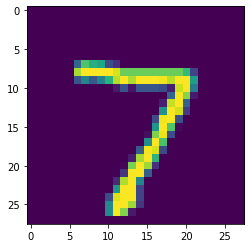

In [21]:
predict(0)